In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2HDRM.TTF"
font = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font)
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
parking_tr = pd.read_csv("./parking_data/train.csv")
parking_te = pd.read_csv("./parking_data/test.csv")
age = pd.read_csv("./parking_data/age_gender_info.csv")

In [3]:
parking_tr.info()
print(parking_te.info())
print(age.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [4]:
parking_tr = parking_tr.replace("-", np.nan)
parking_te = parking_te.replace("-", np.nan)

parking_tr["임대보증금"] = parking_tr["임대보증금"].astype(float)
parking_te["임대보증금"] = parking_te["임대보증금"].astype(float)
parking_tr["임대료"] = parking_tr["임대료"].astype(float)
parking_te["임대료"] = parking_te["임대료"].astype(float)

In [5]:
print(parking_tr.isna().sum())
print(parking_te.isna().sum())
age.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64
단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           186
임대료                             186
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류

지역           0
10대미만(여자)    0
10대미만(남자)    0
10대(여자)      0
10대(남자)      0
20대(여자)      0
20대(남자)      0
30대(여자)      0
30대(남자)      0
40대(여자)      0
40대(남자)      0
50대(여자)      0
50대(남자)      0
60대(여자)      0
60대(남자)      0
70대(여자)      0
70대(남자)      0
80대(여자)      0
80대(남자)      0
90대(여자)      0
90대(남자)      0
100대(여자)     0
100대(남자)     0
dtype: int64

In [6]:
parking_tr.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


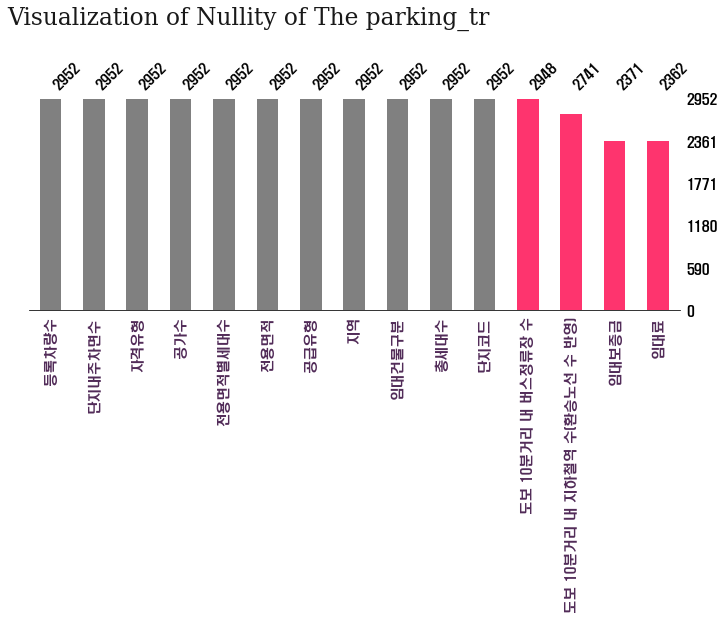

In [7]:
color = ["grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "#fe346e", "#fe346e", "#fe346e", 
         "#fe346e"]
fig, ax = plt.subplots(figsize = (12, 4), dpi = 70)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
msno.bar(parking_tr.iloc[:, :], sort = "descending", color = color, ax = ax, fontsize = 14, labels = "off", filter = "top")
ax.text(-1, 1.35, "Visualization of Nullity of The parking_tr", {"font": "Serif", "Size": 24, "color": "black"}, 
        alpha = 0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center", 
                   **{"Size": 14, "weight": "normal", "color": "#512b58"}, alpha = 1)
ax.set_yticklabels("")
ax.spines["bottom"].set_visible(True)
fig.show()

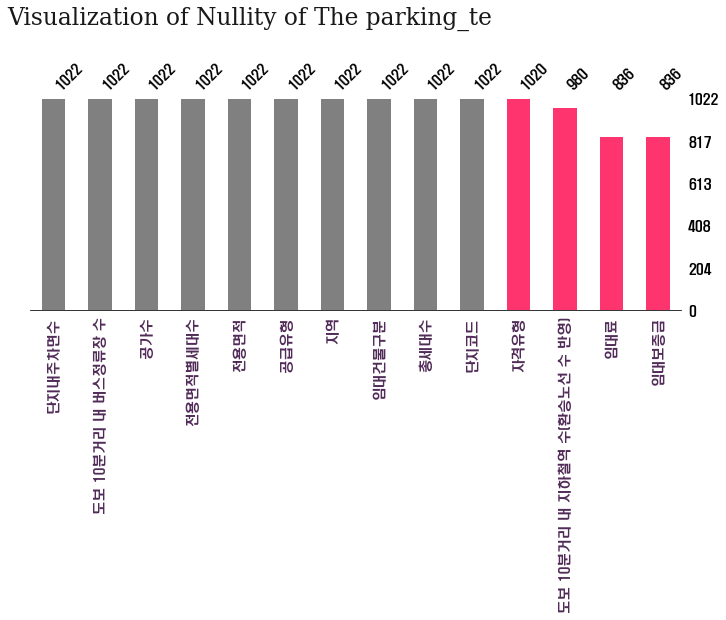

In [8]:
color = ["grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "#fe346e", "#fe346e", "#fe346e", 
         "#fe346e"]
fig, ax = plt.subplots(figsize = (12, 4), dpi = 70)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
msno.bar(parking_te.iloc[:, :], sort = "descending", color = color, ax = ax, fontsize = 14, labels = "off", filter = "top")
ax.text(-1, 1.35, "Visualization of Nullity of The parking_te", {"font": "Serif", "Size": 24, "color": "black"}, 
        alpha = 0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center", 
                   **{"Size": 14, "weight": "normal", "color": "#512b58"}, alpha = 1)
ax.set_yticklabels("")
ax.spines["bottom"].set_visible(True)
fig.show()

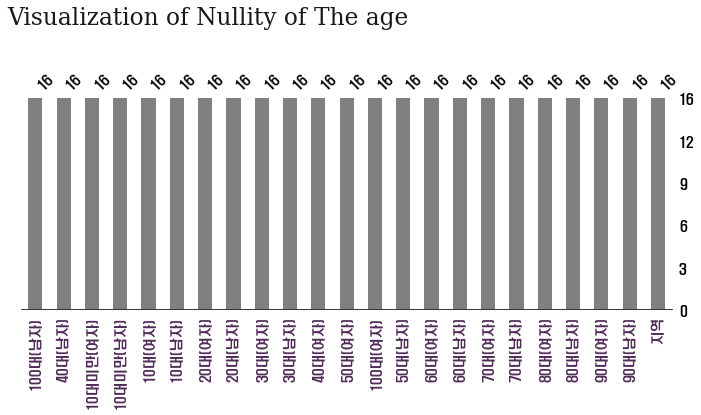

In [9]:
color = ["grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey",
         "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey"]
fig, ax = plt.subplots(figsize = (12, 4), dpi = 70)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
msno.bar(age.iloc[:, :], sort = "descending", color = color, ax = ax, fontsize = 14, labels = "off", filter = "top")
ax.text(-1, 1.35, "Visualization of Nullity of The age", {"font": "Serif", "Size": 24, "color": "black"}, 
        alpha = 0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center", 
                   **{"Size": 14, "weight": "normal", "color": "#512b58"}, alpha = 1)
ax.set_yticklabels("")
ax.spines["bottom"].set_visible(True)
fig.show()

In [10]:
def null_explore(x, y, df):
    df2 = df[df[x].isnull()]
    v_c = df2[y].value_counts()
    return v_c

In [11]:
print(null_explore("임대보증금", "자격유형", parking_tr), "\n")
print(null_explore("임대보증금", "임대건물구분", parking_tr), "\n")
print(null_explore("임대보증금", "지역", parking_tr), "\n")
null_explore("임대보증금", "공급유형", parking_tr)

D    569
H      8
K      4
Name: 자격유형, dtype: int64 

상가     562
아파트     19
Name: 임대건물구분, dtype: int64 

부산광역시      225
대전광역시      120
경상남도        97
충청남도        76
강원도         35
제주특별자치도     25
대구광역시        3
Name: 지역, dtype: int64 



임대상가    562
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [12]:
print(null_explore("임대보증금", "자격유형", parking_te), "\n")
print(null_explore("임대보증금", "임대건물구분", parking_te), "\n")
print(null_explore("임대보증금", "지역", parking_te), "\n")
null_explore("임대보증금", "공급유형", parking_te)

D    180
L      4
C      2
Name: 자격유형, dtype: int64 

상가     177
아파트      9
Name: 임대건물구분, dtype: int64 

울산광역시    47
강원도      47
부산광역시    43
대전광역시    23
충청남도     22
경상남도      4
Name: 지역, dtype: int64 



임대상가    177
영구임대      5
행복주택      4
Name: 공급유형, dtype: int64

In [13]:
print(null_explore("임대료", "자격유형", parking_tr), "\n")
print(null_explore("임대료", "임대건물구분", parking_tr), "\n")
print(null_explore("임대료", "지역", parking_tr), "\n")
null_explore("임대료", "공급유형", parking_tr)

D    569
A      9
H      8
K      4
Name: 자격유형, dtype: int64 

상가     562
아파트     28
Name: 임대건물구분, dtype: int64 

부산광역시      225
대전광역시      120
경상남도        97
충청남도        76
강원도         35
제주특별자치도     25
서울특별시        9
대구광역시        3
Name: 지역, dtype: int64 



임대상가    562
장기전세      9
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [14]:
print(null_explore("임대료", "자격유형", parking_te), "\n")
print(null_explore("임대료", "임대건물구분", parking_te), "\n")
print(null_explore("임대료", "지역", parking_te), "\n")
null_explore("임대료", "공급유형", parking_te)

D    180
L      4
C      2
Name: 자격유형, dtype: int64 

상가     177
아파트      9
Name: 임대건물구분, dtype: int64 

울산광역시    47
강원도      47
부산광역시    43
대전광역시    23
충청남도     22
경상남도      4
Name: 지역, dtype: int64 



임대상가    177
영구임대      5
행복주택      4
Name: 공급유형, dtype: int64

In [15]:
print(null_explore("도보 10분거리 내 버스정류장 수", "자격유형", parking_tr), "\n")
print(null_explore("도보 10분거리 내 버스정류장 수", "임대건물구분", parking_tr), "\n")
print(null_explore("도보 10분거리 내 버스정류장 수", "지역", parking_tr), "\n")
print(null_explore("도보 10분거리 내 버스정류장 수", "공급유형", parking_tr), "\n")
null_explore("도보 10분거리 내 버스정류장 수", "단지코드", parking_tr)

A    4
Name: 자격유형, dtype: int64 

아파트    4
Name: 임대건물구분, dtype: int64 

경상남도    4
Name: 지역, dtype: int64 

공공임대(10년)    4
Name: 공급유형, dtype: int64 



C1649    4
Name: 단지코드, dtype: int64

In [16]:
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "자격유형", parking_tr), "\n")
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "임대건물구분", parking_tr), "\n")
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "지역", parking_tr), "\n")
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "공급유형", parking_tr), "\n")
null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "단지코드", parking_tr)

D    134
A     52
C     19
I      5
E      1
Name: 자격유형, dtype: int64 

상가     127
아파트     84
Name: 임대건물구분, dtype: int64 

충청남도     114
대전광역시     93
경상남도       4
Name: 지역, dtype: int64 

임대상가         127
국민임대          31
영구임대          25
공공임대(50년)     11
공공분양           7
공공임대(10년)      7
공공임대(분납)       3
Name: 공급유형, dtype: int64 



C1874    30
C1616    22
C1875    22
C2258    20
C1004    19
C1704    17
C1983    15
C1350    13
C2583    11
C2644     7
C2100     6
C1068     6
C1312     4
C1649     4
C1005     3
C1175     3
C1424     3
C2156     3
C2216     2
C2520     1
Name: 단지코드, dtype: int64

In [17]:
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "자격유형", parking_te), "\n")
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "임대건물구분", parking_te), "\n")
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "지역", parking_te), "\n")
print(null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "공급유형", parking_te), "\n")
null_explore("도보 10분거리 내 지하철역 수(환승노선 수 반영)", "단지코드", parking_te)

D    22
A    13
J     4
C     3
Name: 자격유형, dtype: int64 

상가     22
아파트    20
Name: 임대건물구분, dtype: int64 

충청남도     33
대전광역시     9
Name: 지역, dtype: int64 

임대상가         22
국민임대         10
행복주택          4
영구임대          3
공공임대(50년)     3
Name: 공급유형, dtype: int64 



C2177    25
C1083     5
C1472     5
C1327     4
C1318     3
Name: 단지코드, dtype: int64

In [18]:
parking_tr[parking_tr["지역"] == "경상남도"].value_counts("도보 10분거리 내 버스정류장 수")

도보 10분거리 내 버스정류장 수
4.0     84
3.0     81
1.0     75
2.0     48
5.0     33
6.0     14
20.0    11
8.0      9
12.0     7
7.0      3
dtype: int64

In [19]:
print(parking_tr["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].value_counts())
parking_te["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].value_counts()

0.0    2302
1.0     400
2.0      33
3.0       6
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64


0.0    881
1.0     64
2.0     35
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [20]:
parking_tr["임대보증금"].fillna(0, inplace = True)
parking_te["임대보증금"].fillna(0, inplace = True)
parking_tr["임대료"].fillna(0, inplace = True)
parking_te["임대료"].fillna(0, inplace = True)
parking_tr["도보 10분거리 내 버스정류장 수"].fillna(4, inplace = True)
parking_tr["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0, inplace = True)
parking_te["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0, inplace = True)

* 임대보증금과 임대료는 별 특징이 없어 결측값을 0으로 대체
* 도보 10분거리 내 버스정류장 수의 결측값은 지역이 경상남도로만 되어 있어서 그 지역의 최빈값으로 대체
* 도보 10분거리 내 지하철역 수(환승노선 수 반영)의 결측값도 마찬가지로 최빈값으로 대체

In [21]:
def bar(feature, choice):
    train = parking_tr[feature].value_counts()
    test = parking_te[feature].value_counts()
    df = pd.DataFrame([train, test])
    df.index = ["train", "test"]
    df.plot(kind = "bar", stacked = choice, figsize = (15, 10))

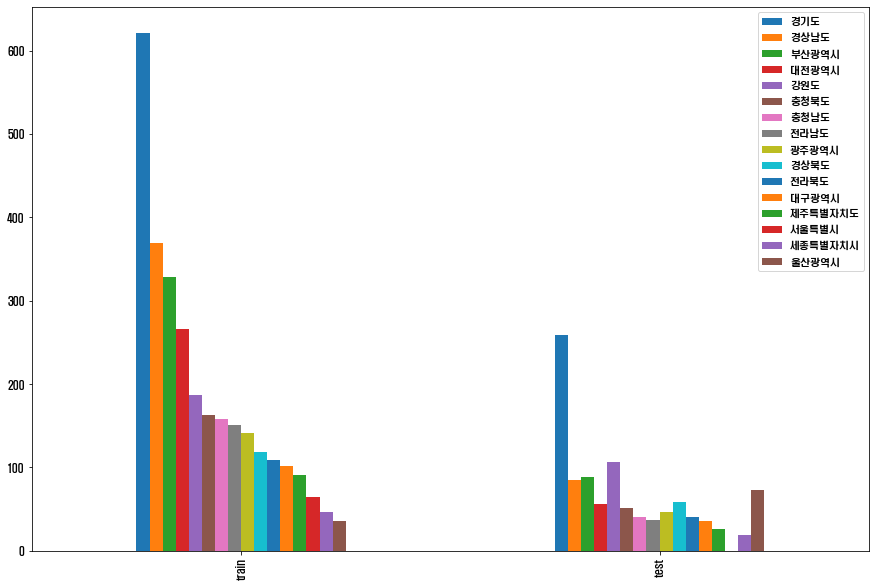

In [22]:
bar("지역", False)

* **train**, **test** 둘 다 경기도가 가장 많으며 **test** 에는 서울특별시가 빠져있음을 알 수 있음

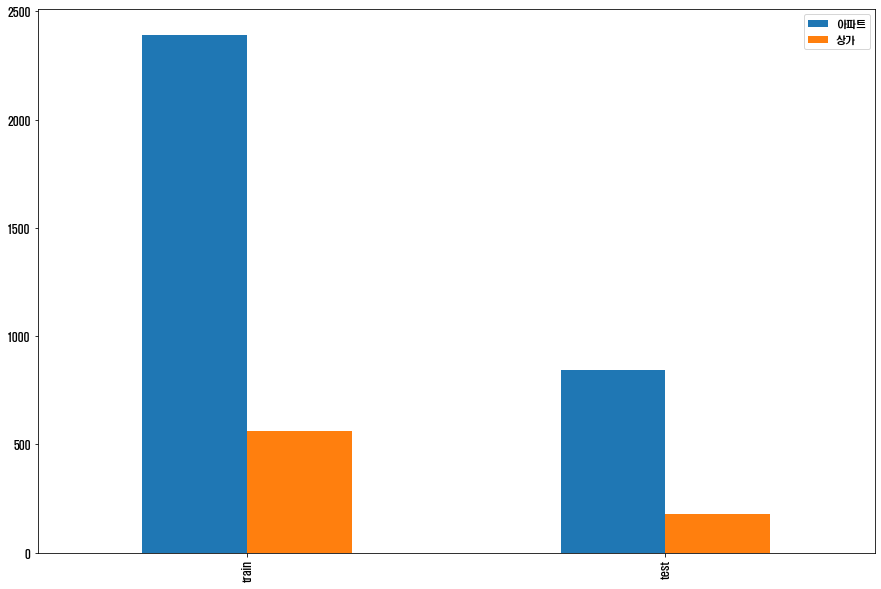

In [23]:
bar("임대건물구분", False)

* **train**, **test** 둘 다 아파트가 상가보다 많음

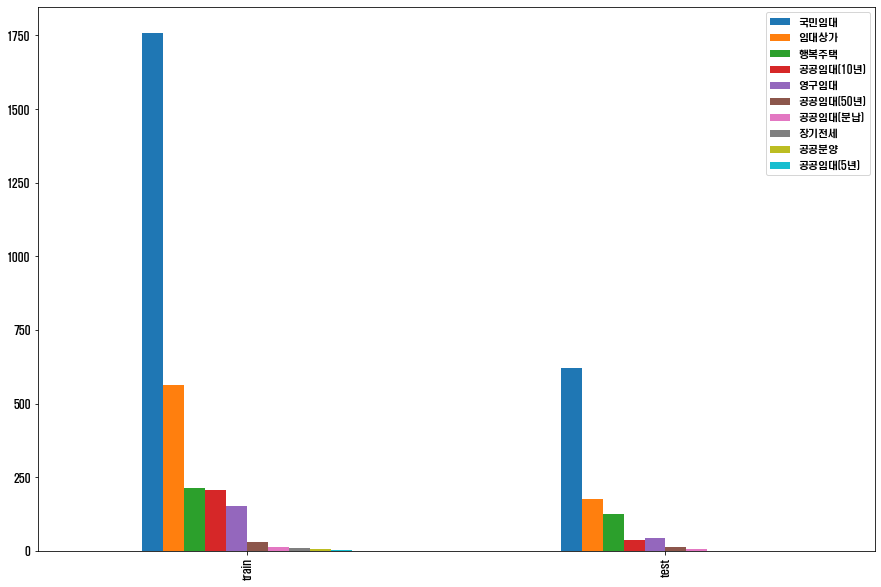

In [24]:
bar("공급유형", False)

* **train**, **test** 둘 다 국민임대가 가장 많음

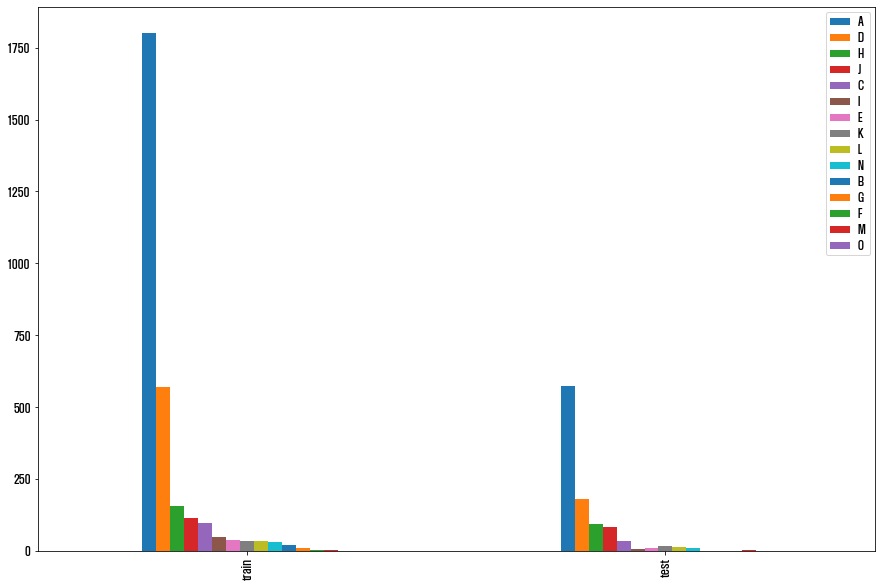

In [25]:
bar("자격유형", False)

* **train**, **test** 둘 다 A 유형이 가장 많음

In [26]:
parking_te.loc[parking_te["자격유형"].isnull(), "자격유형"] = "A"

* 가장 최빈값이 높았던 A형으로 결측값 대체

In [27]:
parking_tr.isna().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,0


In [28]:
parking_te.isna().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,0


In [29]:
age = age.set_index("지역")

Text(-3, -2.065, 'Heatmap of Age')

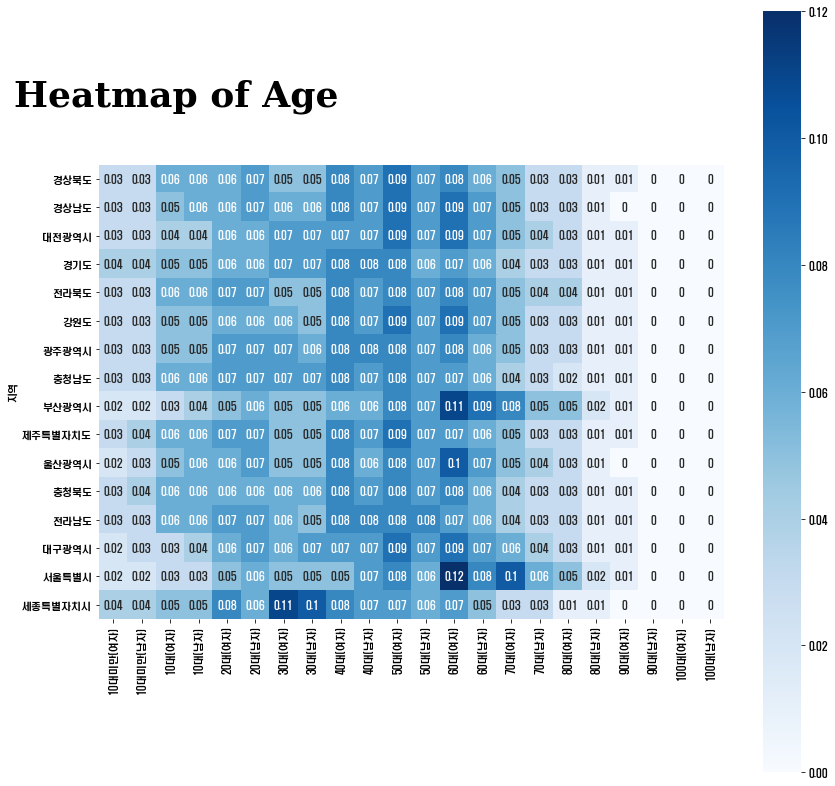

In [30]:
plt.figure(figsize = (14, 14))
g = sns.heatmap(data = age.round(2), annot = True, cmap = "Blues", square = True, annot_kws = {"size": 10})
g.text(-3, -2.065, "Heatmap of Age", {"font": "serif", "size": 36, "weight": "bold"})

* 광역시와 특별시에는 50대 ~ 70대 비중이 높음
* 세종특별자치시에는 20대 ~ 40대 비중이 높음 

In [31]:
num_cols = []
for col in parking_tr.columns:
    if parking_tr[col].dtypes != "object":
        num_cols.append(col)

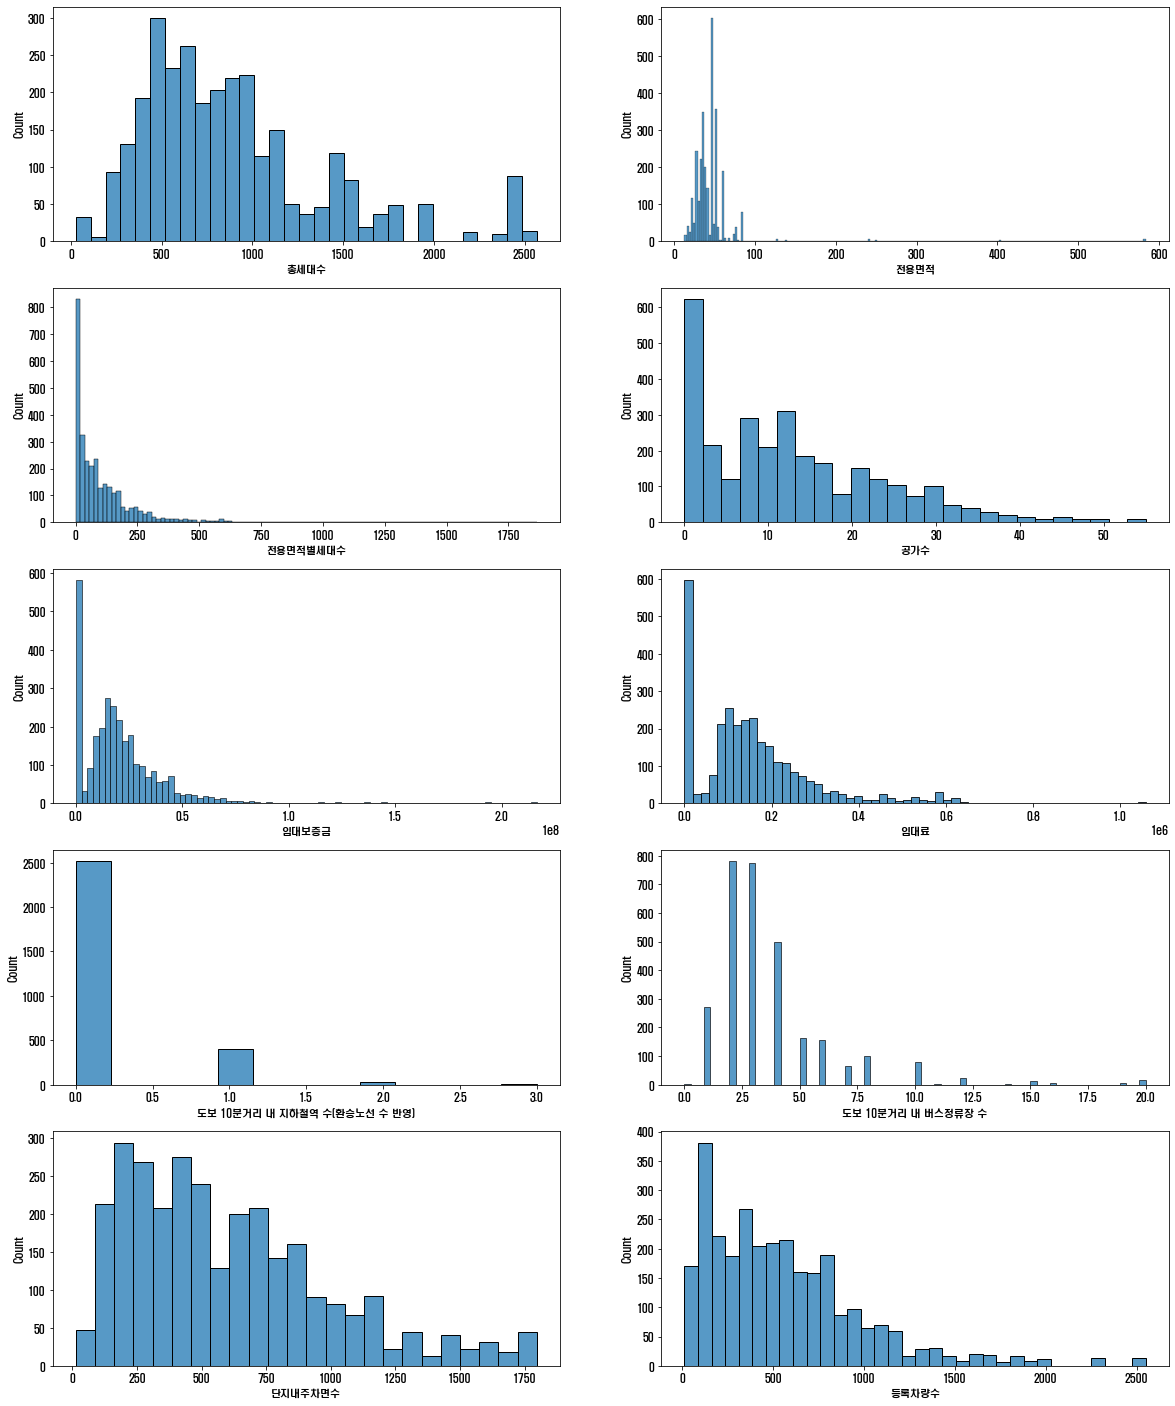

In [32]:
fig = plt.figure(figsize = (20, 25))
for i, n in enumerate(num_cols):
    plt.subplot(len(num_cols) / 2, 2, i + 1)
    sns.histplot(parking_tr[n])

* 대부분 왼쪽으로 기울어진 분포가 나타남

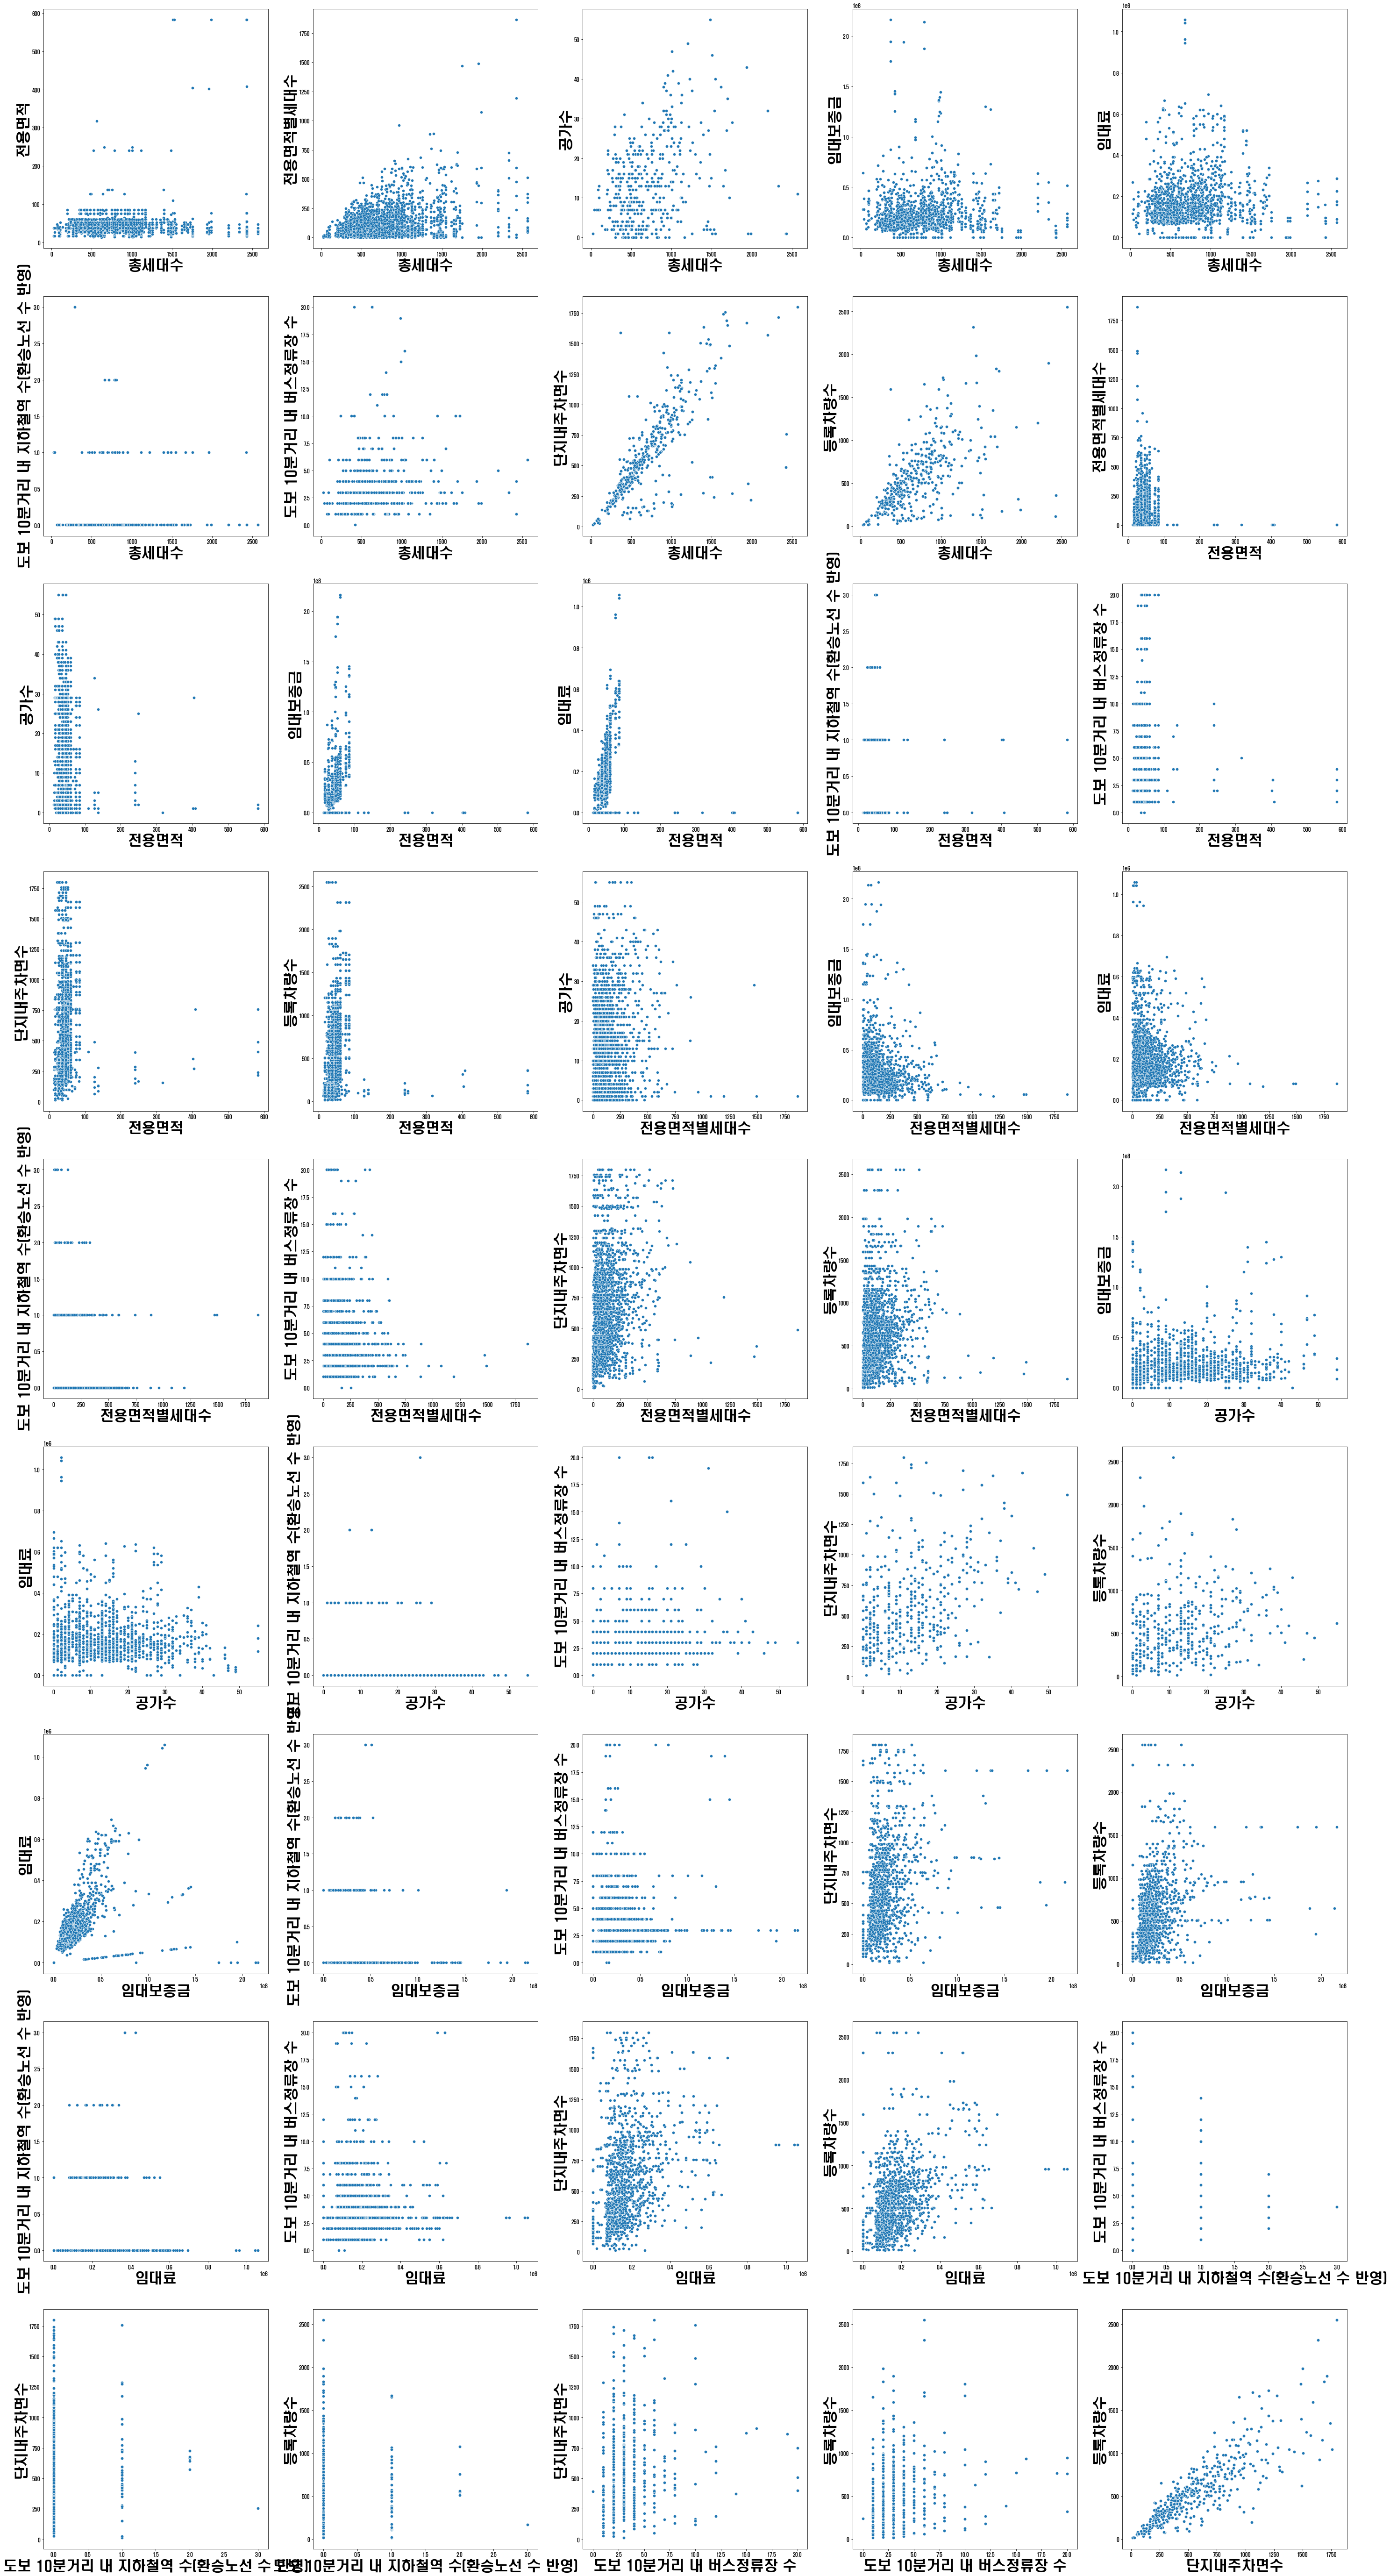

In [33]:
fig, ax = plt.subplots(9, 5)
count1, count2 = 0, 0
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i < j:
            p = sns.scatterplot(parking_tr[num_cols].iloc[:, i], parking_tr[num_cols].iloc[:, j], ax = ax[count1, count2])
            p.figure.set_figwidth(50)
            p.figure.set_figheight(100)
            p.set_xlabel(num_cols[i], fontsize = 30)
            p.set_ylabel(num_cols[j], fontsize = 30)
            count2 += 1
            if count2 > 4:
                count2 = 0
                count1 += 1

* 총세대수와 단지내주차면수는 양의 상관관계를 보이고 등록차량수와 단지내 주차면수도 양의 상관관계를 보임

Text(-3, -2.065, 'Heatmap of Parking_tr')

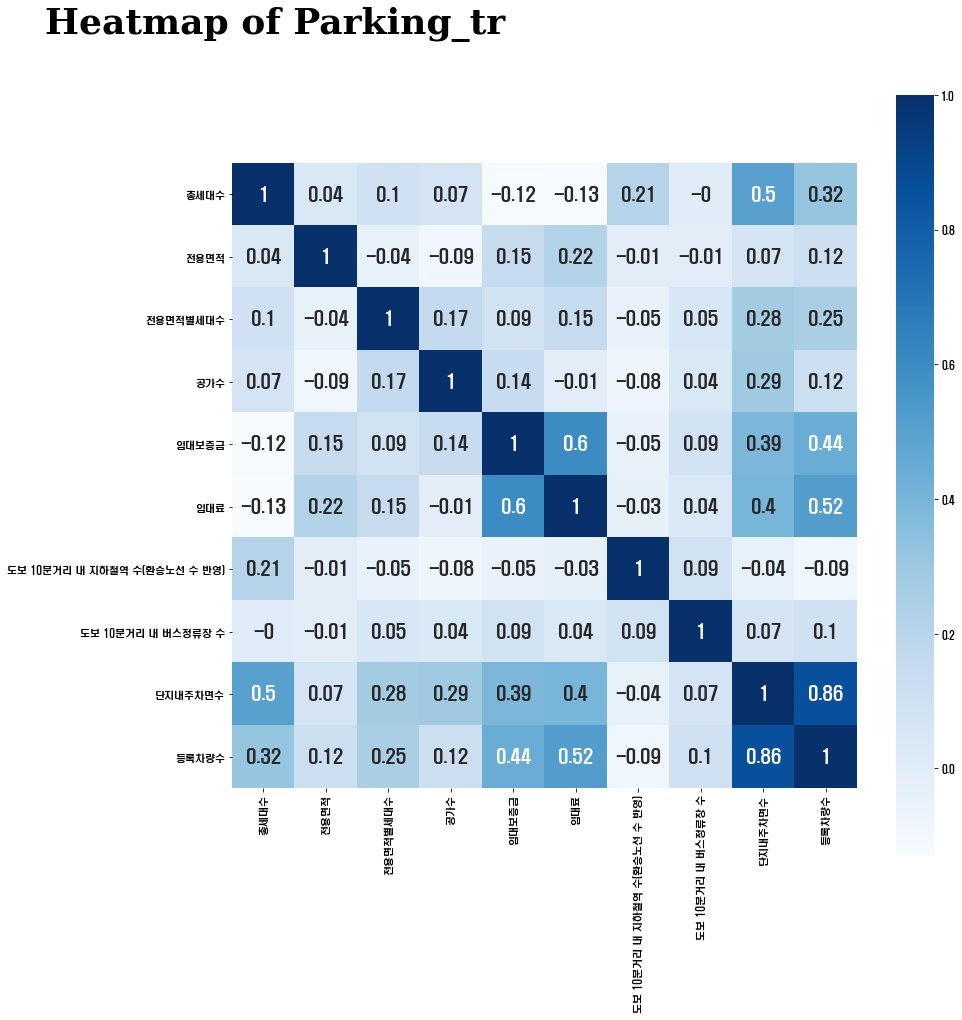

In [34]:
parking_tr_cor = parking_tr[num_cols]
plt.figure(figsize = (14, 14))
corrmat = parking_tr_cor.corr().round(2)
g = sns.heatmap(data = corrmat, annot = True, cmap = "Blues", square = True, annot_kws = {"size": 18})
g.text(-3, -2.065, "Heatmap of Parking_tr", {"font": "serif", "size": 36, "weight": "bold"})

* plot에서 눈에 띄지 않았던 임대료와 임대보증금이 양의 상관관계를 가지고 있음을 알 수 있음